![Banner](img/banner.png)

# **Actividad No.2:** Multiplicadores de Lagrange

***Matemáticas para Machine Learning***.

**Semana 7 - Lección 2:** Minimización de una función cuadrática con restricciones lineales.

**Profesor:** *Fernando Lozano* - **Autor Notebook:** *Sergio David Salazar Isairias*

# Introducción

## Descripción

El presente *jupyter notebook* contine todo el material para el desarrollo de la actividad 2 de la semana 7 del curso ***Matemáticas para Machine Learning***, correspondiente a la lección 2: Minimización de una función cuadrática con restricciones lineales. En este se utilizará el conocimiento adquirido sobre gradiente y Hessiana para identificar mínimos locales..

**Objetivos de Aprendizaje:**

*   Identificar condiciones necesarias de primer y segundo orden de mínimos locales.

## Metodología

Para desarrollar el taller usted deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

```python
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================
```

Edite o complete el códgio dentro de estas lineas de comentarios. Dentro de estos comentarios encontrará indicaciónes de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o esten solo igualadas a None, complete la asignación).

# Teoría

Sea $f(\vec{x})$ una función cuadrática de y $\vec{x}$ una vector $n$-dimensional. Considere un conjunto de $k$ restricciones sobre $\vec{x}$. Donde la i-ésima restricción es de la forma $a_{i}^{T}\vec{x}=c_i$. Con $a_{i}$ el vector de coeficientes de las variables en la restricción lineal y $c_i$ es una constante para cada restricción. Ahora, suponga que desea minimizar $f(\vec{x})$ sujeto a las restricciones lineales de igualdad ¿Cómo hallaría el valor de $\vec{x}$?

Optimizar una función sujeta a un conjunto de restricciones no es una tarea sencilla, pues su dificultad incrementa conforme aumenta la cantidad de restricciones, así como la complejidad de estas. No obstante, si las restricciones son de baja complejidad, en particular restricciones linales, entonces la tarea se simplifica, puesto que se puede utilizar el **Método de Multiplicadores de Lagrange**.

Los **Multiplicadores de Lagrange** son un procedimiento ideado por *Joseph Louis Lagrange* que transforma un problema de optimización de $n$ variables con $k$ restricciones, en un problema sin restricciones con $n+k$ variables de decisión.

Sea $g_{i}(\vec{x})=a_{i}^{T}\vec{x}=c_i$, se propone la siguiente función.
$$ h(\vec{x}) = f(\vec{x})-\sum_{i=1}^{k}\lambda_{i}(g_{i}(\vec{x})-c_{i})$$

donde $\lambda_{i}$ es el multiplicador de Lagrange de la restricción $i$.

Ahora, para minimizar $f(\vec{x})$ se minimiza $h(\vec{x})$ por medio de la definición de punto interior (gradiente cero). Entonces, se halla el valor de $\vec{x}$ tal que:
$$\frac{\partial h}{\partial x_{i}}=0,   \forall i\in [1,k]$$.

Es decir, se halla el valor de $\vec{x}$ tal que:
$$\frac{\partial f}{\partial x_{i}}=-\sum_{j=1}^{k}\lambda_{j}\frac{\partial g_{j}}{\partial x_{i}}$$.

# Inicialización

In [1]:
# Básico
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# UTILIDADES =================================
# Correr una única vez por sesión ============
from maiautils import MaiaUtils
ipython = get_ipython()
mutils = MaiaUtils(ipython) 
# ============================================

# Ejemplo

Sea $$f(x,y) = x^{3/4}y^{1/4}$$
Se desea minimizar $f(x,y)$ sujeto a 
$$25x+250y=5000$$

## Definir funciones del problema

In [3]:
def f(x,y):
    return x**(3/4)*y**(1/4)

In [4]:
def g(x):
    return (5000-25*x)/250

## Visualizar el problema

In [5]:
x = np.linspace(0,200,10000)
y = np.linspace(0,20,100)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

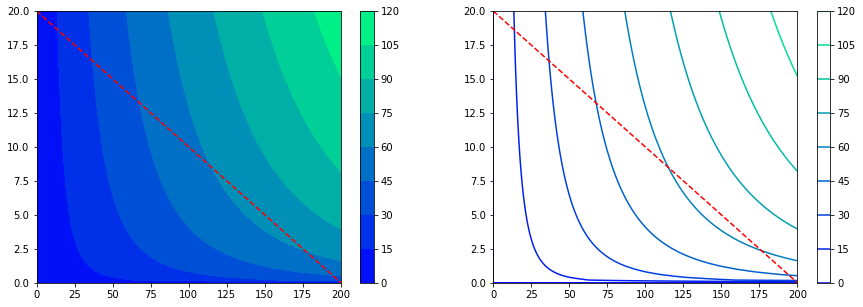

In [6]:
fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))

CS = ax_l.contourf(X, Y, Z, 8,cmap='winter')
ax_l.plot(x,g(x),'r--')
cbar = fig.colorbar(CS,ax=ax_l)

CS = ax_r.contour(X, Y, Z, 8,cmap='winter')
ax_r.plot(x,g(x),'r--')
cbar = fig.colorbar(CS,ax=ax_r)

## Método de Lagrange

El Lagrangiano $h(x,y,\lambda)$ es el siguiente.
$$h(x,y,\lambda) = x^{3/4}y^{1/4} - \lambda(25x+250y-5000)$$

Ahora, calculese el gradiente de $h(x,y,\lambda)$.
$$\frac{\partial h}{\partial x} = \frac{3}{4}x^{-1/4}y^{1/4} - 25\lambda$$

$$\frac{\partial h}{\partial y} = \frac{1}{4}x^{3/4}y^{-3/4} - 250\lambda$$

$$\frac{\partial h}{\partial \lambda} = 25x+250y-5000$$

Igualando el gradiente de $h(x,y,\lambda)$ al vector cero se obtiene la siguiente condición sobre $x$ y $y$.
$$x=30y$$.

Ahora, se reemplaza en $g(x,y)$.
$$25x+250y=5000$$
$$750y+250y=5000$$
$$\rightarrow y=5$$
$$\rightarrow x=150$$

In [7]:
print(f'El mínimo de f(x,y) es: {f(150,5)}')

El mínimo de f(x,y) es: 64.09305095943512


Entonces el mínimo de $f(x,y)$ sujeto a $g(x,y)$ se encuentra en el punto $(150,5)$.

# Problemas

Dada $f$ una función de $n$ variables de la forma:
$$ 
f = \mathbf{x}^T A \mathbf{x} + B \mathbf{x}
$$

Con $k$ restricciones de la forma.
$$
g(x)=a^{T}x=c
$$

Realice una función que grafique las curvas de nivel de $f$ y las restricciones lineales cuando $n=2$.

In [8]:
def grafica_nivel(A:list,B:list,a:list,c:list,xlim:list,ylim:list,n=1000):
    """ 
    Grafica las curvas de nivel de f y las rectas correspondientes a las restricciones lineales.
    ___________________________________
    Entrada:
    A: [list] Lista cuyos elementos son las filas de la matriz A.
    B: [list] Lista que contiene los coeficientes del vector B.
    a: [list] Lista cuyos elementos son los vector de las restricciones lineales.
    c: [list] Lista cuyos elementos son las constantes asociadas a cada restricción.
    xlim: [list] Limites del eje x.
    ylim: [list] Limites del eje y.
    n: [int] Número de muestras para cada variable independiente.
    ___________________________________
    Salida:
    Se graficaron las curvas de nivel de la función y las rectas de las restricciones.
    """
    x = np.linspace(xlim[0],xlim[1],n)
    y = np.linspace(ylim[0],ylim[1],n)
    
    X,Y = np.meshgrid(x,y)
    
    # =====================================================
    # COMPLETAR ===========================================
    # reemplace X por la expresión correcta para Z.
    # Z depende de A y B.
    Z = X
    # =====================================================
    
    fig, (ax_l, ax_r) = plt.subplots(1, 2, figsize = (15, 5))

    CS = ax_l.contourf(X, Y, Z, 8,cmap='winter')
    for i in range(len(a)):
        ax_l.plot(x,(c[i]-a[i][0]*x)/a[i][1])
    cbar = fig.colorbar(CS,ax=ax_l)

    CS = ax_r.contour(X, Y, Z, 8,cmap='winter')
    for i in range(len(a)):
        ax_r.plot(x,(c[i]-a[i][0]*x)/a[i][1])
    cbar = fig.colorbar(CS,ax=ax_r)

Compruebe la función con los siguientes parámetros

In [9]:
A = [[1,1],[0,3]]
B = [1,5]
a = [[1,-1],[0,1]]
c = [1,8]
xlim = [-20,20]
ylim = [-20,20]

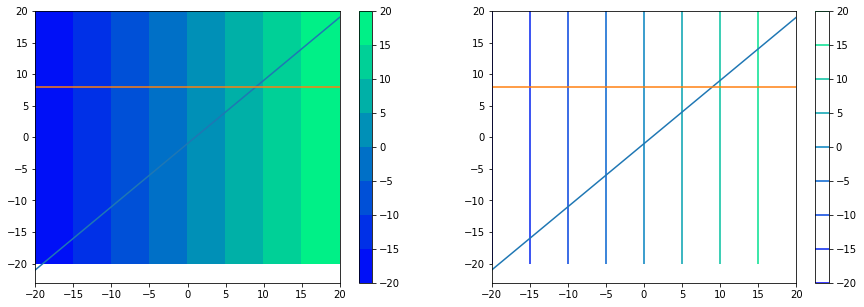

In [10]:
grafica_nivel(A,B,a,c,xlim,ylim)

Realice una función que reciba los parámetros $A$ y $B$ y los vectores $a_{i}$ y $c$ y retorne el argumento que minimiza $f$ sujeto a las restricciones lineales para $n = 2$. 

Para completar la función tiene dos alternativas: deducir analiticamente la solución para $n=2$ o utilizar variables simbolicas por medio de *sympy*.

In [11]:
def metodo_lagrange(A:list,B:list,a:list,c:list):
    """ 
    Implementa el método de Multiplicadores de Lagrange
    ___________________________________
    Entrada:
    A: [list] Lista cuyos elementos son las filas de la matriz A.
    B: [list] Lista que contiene los coeficientes del vector B.
    a: [list] Lista cuyos elementos son los vector de las restricciones lineales.
    c: [list] Lista cuyos elementos son las constantes asociadas a cada restricción.
    ___________________________________
    Salida:
    out : [dic] Argumento que minimiza f(x,y) y valores de los multiplicadores de Lagrange. 
                Si el problema es infactible retorna [0,0].
    """
    
    x, y, l0, l1 = symbols('x, y, l0, l1')
    
    # =====================================================
    # COMPLETAR ===========================================
    # defina correctamente Lagrangiano del ejercicio.
    # Para ello:
    #  - defina la función objetivo del problema inicial
    #  - defina las restricciones del problema
    #  - considere los multiplicadores de Lagrange
    L = 0
    # =====================================================
        
        
    dl = [diff(L,x),diff(L,y)]
    
    # =====================================================
    # COMPLETAR ===========================================
    # agrege a dl las derivadas parciales faltantes
    # =====================================================

    try:
        sol = solve(dl,[x,y,l0,l1],dic=True)
    except:
        sol = {x:0,y:0}
    return sol

In [16]:
A = [[1,1],[0,3]]
B = [1,5]
a = [[1,-1],[0,10]]
c = [1,8]

In [17]:
ll = metodo_lagrange(A,B,a,c)
print(ll)
### BEGIN HIDDEN TESTS
ss = [9/5,4/5,27/5,17/10]
try:
    ll = [i for i in ll.values()]
    ll = [ll[i]-ss[i]==0 for i in range(4)]
    assert ll, "La función metodo_lagrange es incorrecta."
except:
    print("La función es incorrecta.")
### END HIDDEN TESTS

[]
La función es incorrecta.


In [ ]:
mutils.calificar_minimo_local(metodo_lagrange)